In [131]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("capstone_data_clean.csv")
df["Adv_Year"] = df["Adv_Year"].astype("category")
df["Adv_Month"] = df["Adv_Month"].astype("category")
df["Gearbox_Type"] = df["Gearbox_Type"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")

In [133]:
df.drop(df[df["Price"] > 3000000].index, inplace=True)
df.drop(df["Reg_Year"].sort_values().head(1).index, inplace=True)

In [134]:
df["Price"].describe()

count    2.671050e+05
mean     1.471860e+04
std      2.591019e+04
min      1.000000e+02
25%      4.990000e+03
50%      9.299000e+03
75%      1.715000e+04
max      2.599990e+06
Name: Price, dtype: float64

In [135]:
df["Price"].mode()

0    3995.0
Name: Price, dtype: float64

<Figure size 600x400 with 0 Axes>

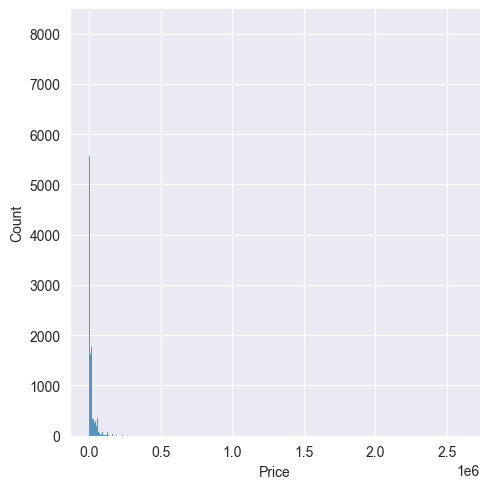

In [136]:
fig = plt.figure(figsize=(6,4))

sns.displot(df["Price"])

### Let's zoom in a little bit

In [137]:
len(df[df["Price"] > 200000])

584

In [138]:
len(df[df["Price"] < 300])

140

In [143]:
condition1 = df["Price"] < 200000
# condition2 = df["Price"] > 500
condition3 = df["Reg_Year"] >= 2000
sample = df[condition1 & condition3]

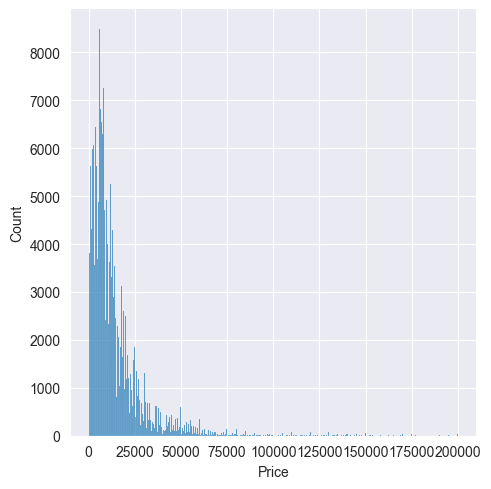

In [144]:
sns.displot(sample["Price"])

plt.show()

### Let's zoom in even more, no matter how many records are getting cut.

In [145]:
condition1 = df["Price"] < 40000
# condition2 = df["Price"] > 500
condition3 = df["Reg_Year"] >= 2000
sample = df[condition1 & condition3]

In [146]:
len(df) - len(sample)

15812

In [147]:
stats.normaltest(sample["Price"], nan_policy="omit")

NormaltestResult(statistic=40976.16209154647, pvalue=0.0)

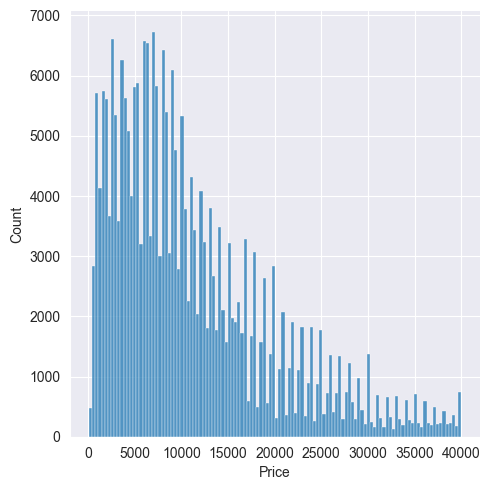

In [148]:
sns.displot(sample["Price"])

plt.show()

### Conclusion - No matter how many outliers I cut off, the distribution is still going to be positively skewed.

# Categoric variable's distribution and influence on Price

## Gearbox_Type

In [149]:
df["Gearbox_Type"].value_counts().reset_index()

,Gearbox_Type,count
0,Manual,170830
1,Automatic,97116
2,Semi-Automatic,137


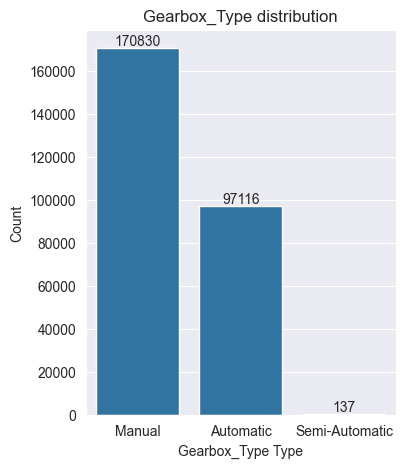

In [150]:
plt.figure(figsize=(4, 5))
plt.title("Gearbox_Type distribution")
plt.xlabel("Gearbox_Type Type")
plt.ylabel("Count")

counted = df["Gearbox_Type"].value_counts().reset_index()
g = sns.barplot(counted, x="Gearbox_Type", y="count", order=df["Gearbox_Type"].value_counts().index)

g.bar_label(g.containers[0])
plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/4232300080.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels = df.groupby(["Gearbox_Type"])["Price"].median().sort_values(ascending=False).index


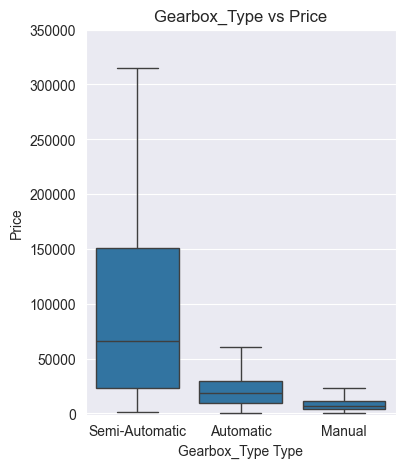

In [151]:
plt.figure(figsize=(4, 5))
plt.title("Gearbox_Type vs Price")
plt.xlabel("Gearbox_Type Type")
plt.ylabel("Price")

labels = df.groupby(["Gearbox_Type"])["Price"].median().sort_values(ascending=False).index

g = sns.boxplot(data=df, x="Gearbox_Type", y="Price", fliersize=0, order=labels)
plt.ylim(-1000, 350000)

plt.show()

There's roughly 100 observations of Semi-Automatic gearbox type in the dataset. Hence, the results are unreliable and hard to compare with other categories.  

In [152]:
gb = df[df["Gearbox_Type"].isin(["Automatic", "Manual"])]
gb["Gearbox_Type"].unique()

['Automatic', 'Manual']
Categories (3, object): ['Automatic', 'Manual', 'Semi-Automatic']

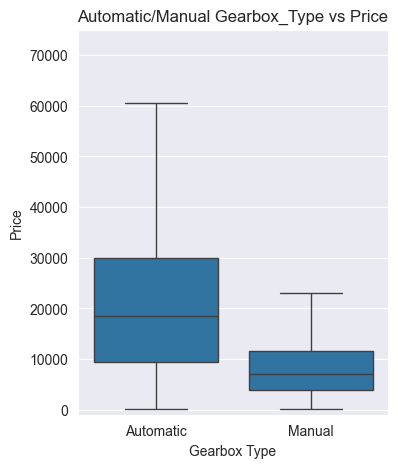

In [153]:
plt.figure(figsize=(4, 5))
plt.title("Automatic/Manual Gearbox_Type vs Price")
plt.xlabel("Gearbox Type")
plt.ylabel("Price")

g = sns.boxplot(data=gb, x="Gearbox_Type", y="Price", fliersize=0, order=["Automatic", "Manual"])
plt.ylim(-1000, 75000)

plt.show()


## Fuel_Type

In [154]:
df["Fuel_Type"].value_counts().reset_index()

,Fuel_Type,count
0,Diesel,132792
1,Petrol,127375
2,Petrol Hybrid,4877
3,Electric,1302
4,Petrol Plug-in Hybrid,1265
5,Diesel Hybrid,155
6,Diesel Plug-in Hybrid,39
7,Bi Fuel,28
8,Petrol Ethanol,8


/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/425845881.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


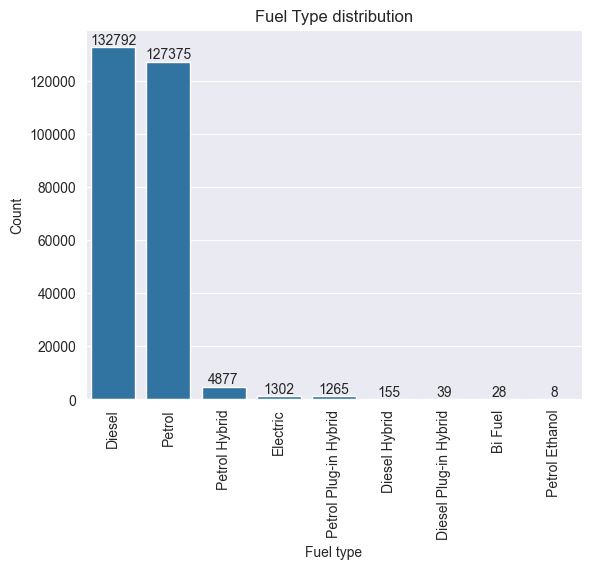

In [155]:
plt.title("Fuel Type distribution")
plt.xlabel("Fuel type")
plt.ylabel("Count")

labels = df["Fuel_Type"].value_counts().index
counted = df["Fuel_Type"].value_counts().reset_index()

g = sns.barplot(counted, x="Fuel_Type", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/607396794.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  labels = sample.groupby("Fuel_Type")["Price"].median().sort_values(ascending=False).index
/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/607396794.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


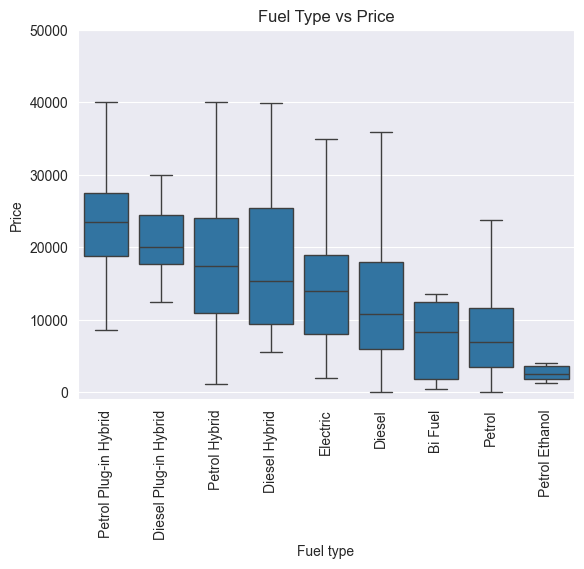

In [157]:
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel type")
plt.ylabel("Price")

labels = sample.groupby("Fuel_Type")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=sample, x="Fuel_Type", y="Price", fliersize=0, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-1000, 50000)

plt.show()

## Advertisement year

In [158]:
df["Adv_Year"].value_counts().reset_index()

,Adv_Year,count
0,2018,239972
1,2021,14864
2,2017,11319
3,2020,1268
4,2016,581
5,2019,107
6,2015,105
7,2014,27
8,2013,7


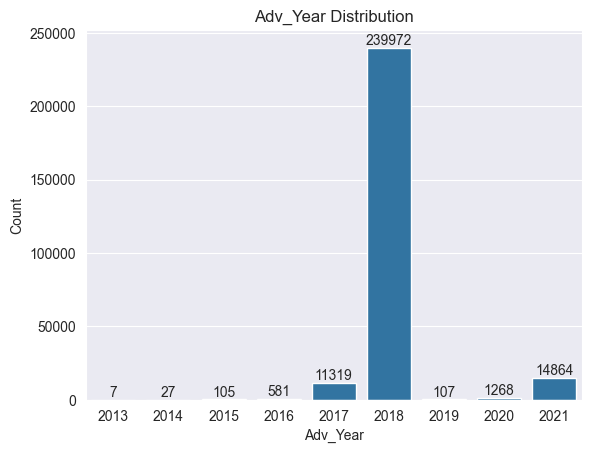

In [159]:
plt.title("Adv_Year Distribution")
plt.xlabel("Adv_Year")
plt.ylabel("Count")

counted = df["Adv_Year"].value_counts().reset_index()

g = sns.barplot(counted, x="Adv_Year", y="count")
g.bar_label(g.containers[0])

plt.show()

As shown on the chart - most of the ovservations come from the 2018th.

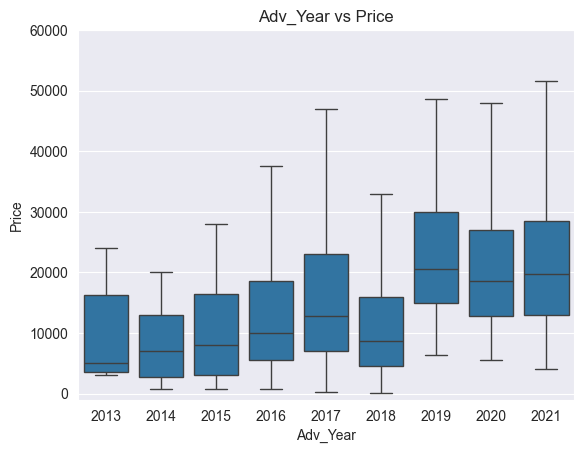

In [160]:
plt.title("Adv_Year vs Price")
plt.xlabel("Adv_Year")
plt.ylabel("Price")

g = sns.boxplot(data=df, x="Adv_Year", y="Price", fliersize=0)
plt.ylim(-1000, 60000)
plt.show()

## Advertisement month

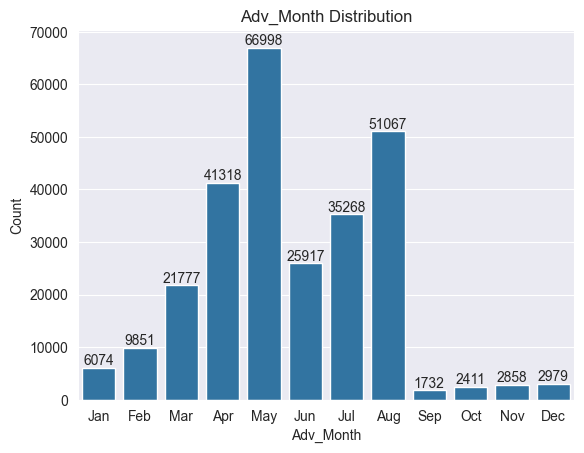

In [161]:
plt.title("Adv_Month Distribution")
plt.xlabel("Adv_Month")
plt.ylabel("Count")
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

g = sns.countplot(df, x="Adv_Month", order=labels)
g.bar_label(g.containers[0])

plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/282138638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=df, x="Adv_Month", y="Price", fliersize=0, order=labels, palette="flare")


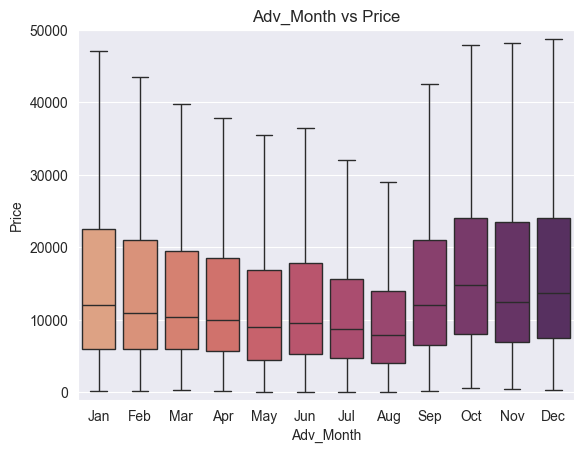

In [162]:
plt.title("Adv_Month vs Price")
plt.xlabel("Adv_Month")
plt.ylabel("Price")

g = sns.boxplot(data=df, x="Adv_Month", y="Price", fliersize=0, order=labels, palette="flare")

plt.ylim(-1000, 50000)

plt.show()

### Countplot in 2018th

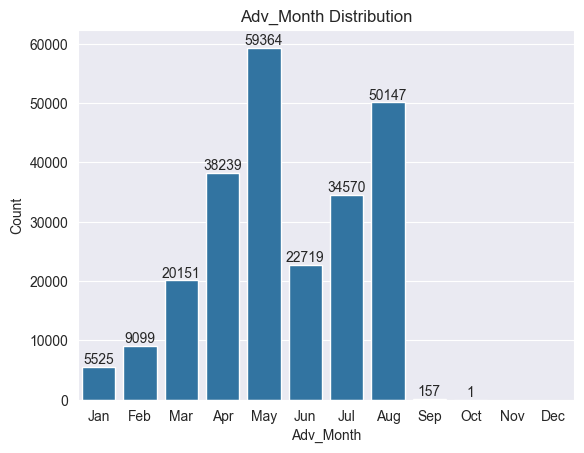

In [163]:
sample = df[df["Adv_Year"] == 2018]

plt.title("Adv_Month Distribution")
plt.xlabel("Adv_Month")
plt.ylabel("Count")
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

g = sns.countplot(sample, x="Adv_Month", order=labels)
g.bar_label(g.containers[0])

plt.show()

## Maker

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/3015511740.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


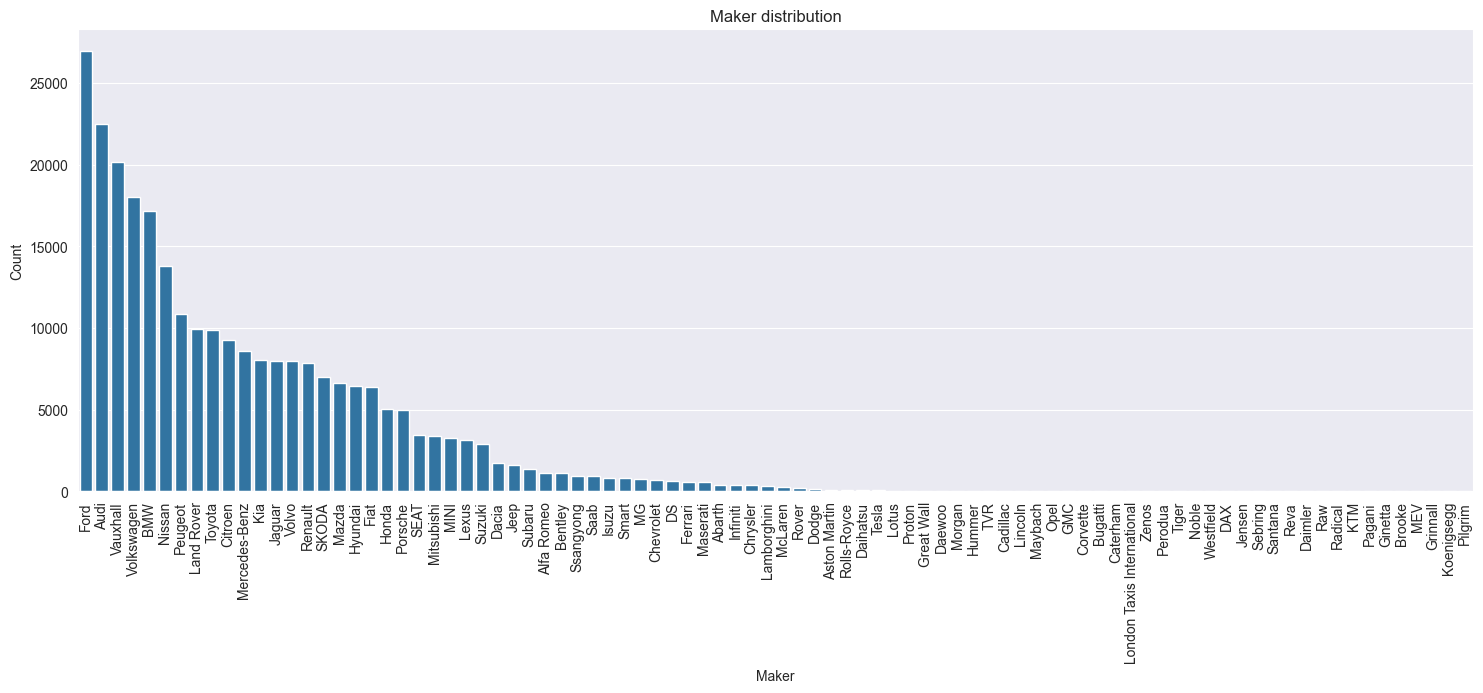

In [187]:
plt.figure(figsize=(18,6))
plt.title("Maker distribution")
plt.xlabel("Maker")
plt.ylabel("Count")

labels = df["Maker"].value_counts().index
counted = df["Maker"].value_counts().reset_index()

g = sns.barplot(counted, x="Maker", y="count", order=labels)

# g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/206543364.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


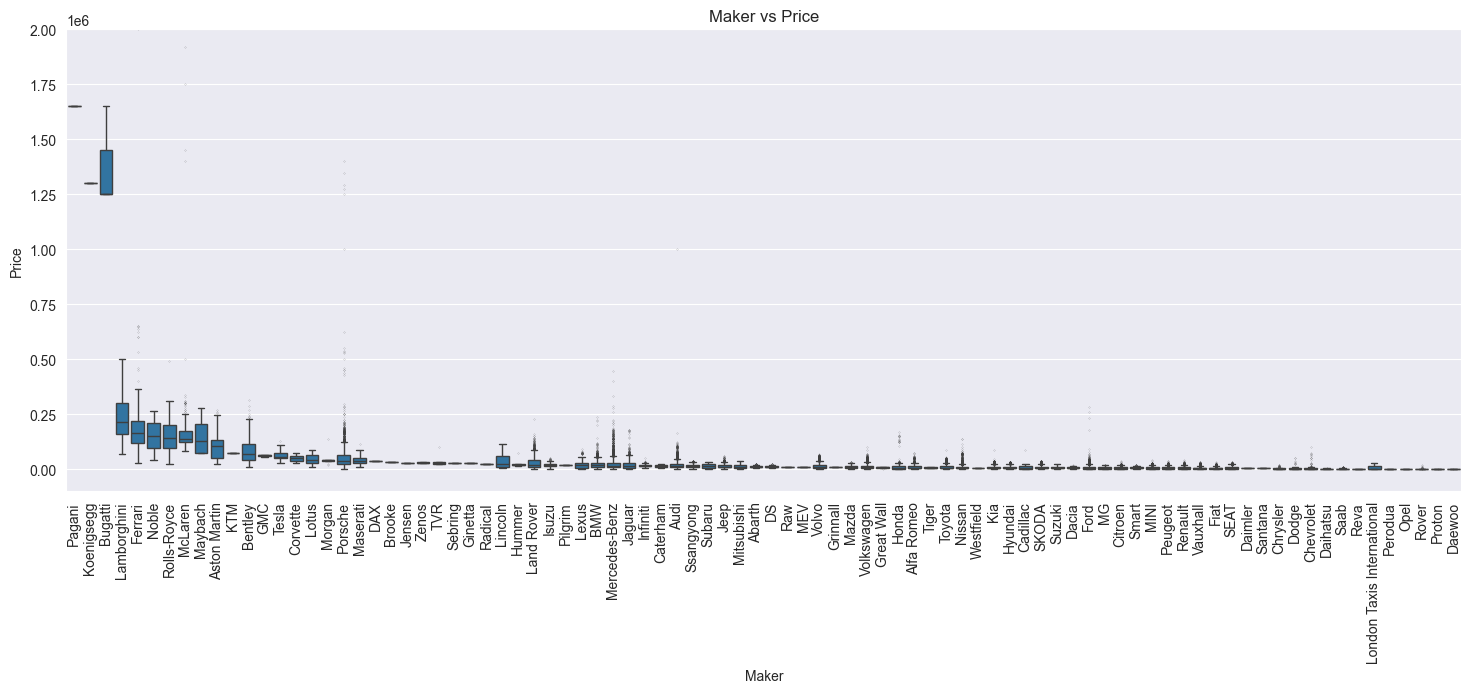

In [175]:
plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = df.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=df, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-100000, 2000000)

plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/162846214.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


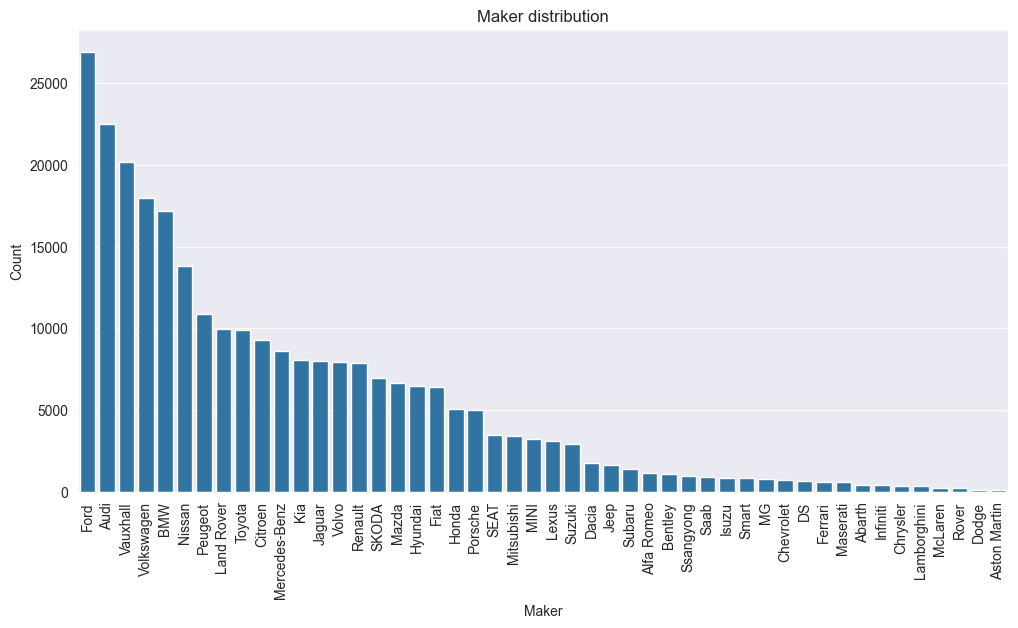

In [197]:
makers = df["Maker"].value_counts()[df["Maker"].value_counts() > 100].index
common = df[df["Maker"].isin(makers)]

plt.figure(figsize=(12,6))
plt.title("Maker distribution")
plt.xlabel("Maker")
plt.ylabel("Count")

labels = common["Maker"].value_counts().index
counted = common["Maker"].value_counts().reset_index()

g = sns.barplot(counted, x="Maker", y="count", order=labels)

# g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()


/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/3368034953.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


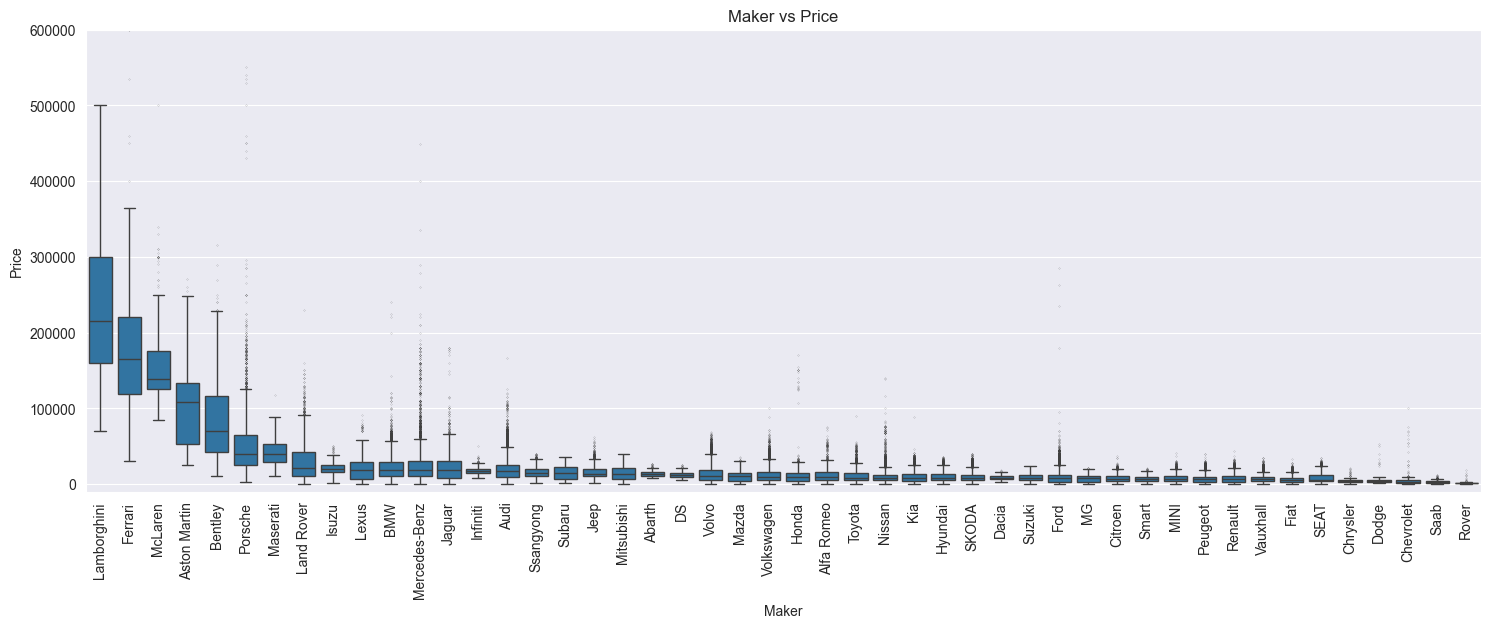

In [196]:
plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = common.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=common, x="Maker", y="Price", fliersize=0.1, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-10000, 600000)

plt.show()

In [174]:
df.groupby("Maker")["Price"].median().sort_values(ascending=False)

Maker
Pagani         1650000.0
Koenigsegg     1300000.0
Bugatti        1250000.0
Lamborghini     214999.0
Ferrari         164995.0
                 ...    
Perodua           1055.0
Opel              1045.0
Rover             1000.0
Proton             999.0
Daewoo             850.0
Name: Price, Length: 88, dtype: float64

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/3521189321.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


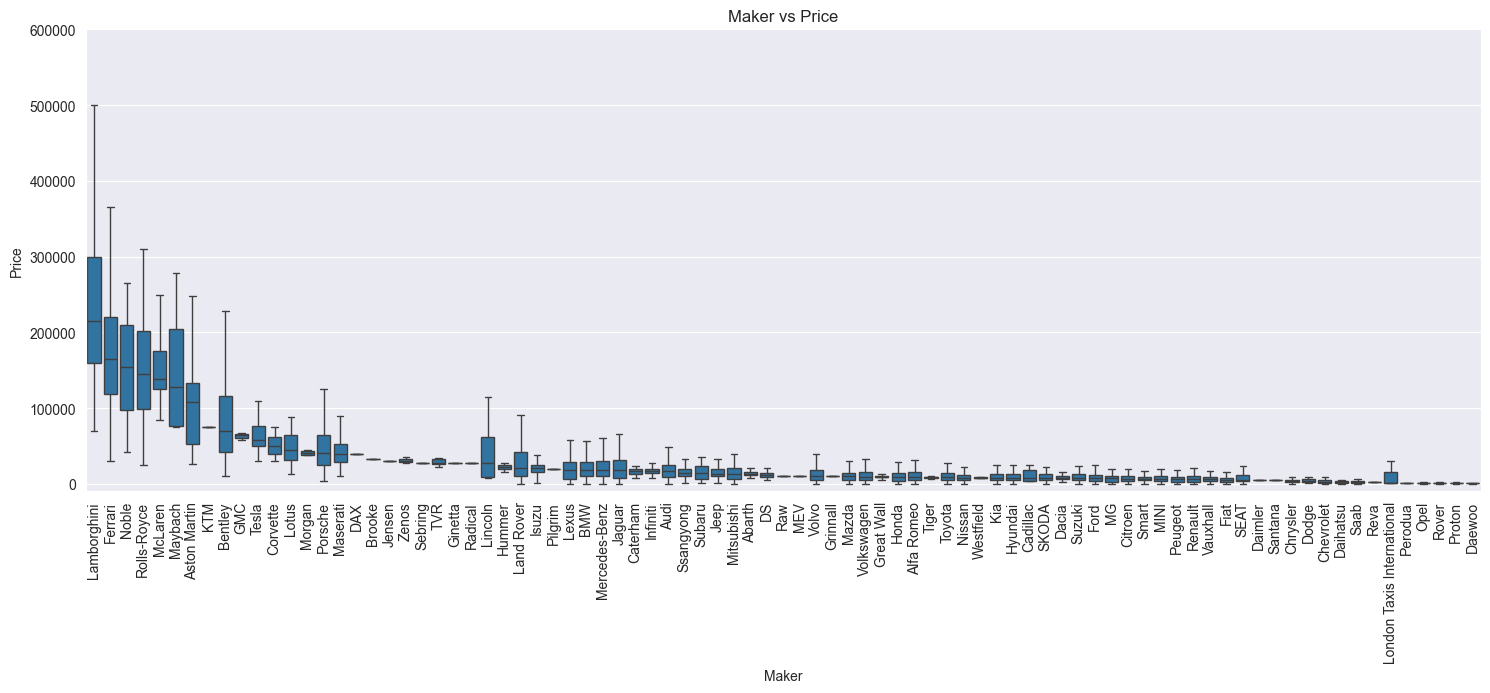

In [184]:
cars = df[~df["Maker"].isin(["Pagani", "Koenigsegg", "Bugatti"])]

plt.figure(figsize=(18,6))
plt.title("Maker vs Price")
plt.xlabel("Maker")
plt.ylabel("Price")

labels = cars.groupby("Maker")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=cars, x="Maker", y="Price", fliersize=0, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-10000, 600000)

plt.show()

## Genmodel

In [169]:
df.groupby("Genmodel").count()

,Maker,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Body_Type,Gearbox_Type,Fuel_Type,Reg_Year,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
Genmodel,,,,,,,,,,,,,,,,,,,,,
'Cee''d',1227,1227,1227,1227,1227,1211,1227,1227,1227,1227,...,1213,1163,1213,1213,1213,1213,1107,1213,1215,1214
'Pro_Cee''d',385,385,385,385,385,383,385,385,385,385,...,378,363,378,378,378,378,375,378,381,382
1 Series,1723,1723,1723,1723,1723,1696,1722,1723,1723,1723,...,1379,1313,1379,1379,1379,1379,1377,1334,1706,1720
1007,44,44,44,44,44,43,44,44,44,44,...,43,43,43,43,43,43,43,43,43,43
106,5,5,5,5,5,5,5,5,5,5,...,5,4,4,4,4,4,4,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iQ,242,242,242,242,242,240,242,242,242,242,...,241,232,241,241,241,241,241,241,242,242
ix20,404,404,404,404,404,395,403,403,403,404,...,380,378,380,380,380,380,380,380,402,395
ix35,373,373,373,373,373,358,373,373,373,373,...,370,353,370,370,370,370,370,327,371,370


In [171]:
df.groupby("Genmodel")["Price"].mean().sort_values(ascending=False)



Genmodel
Laferrari                    2.431663e+06
Enzo                         2.100000e+06
P1                           1.801990e+06
Huayra                       1.650000e+06
Veyron                       1.383333e+06
                                 ...     
Alpina D3 Bi-Turbo                    NaN
Alpina D4                             NaN
Alpina D5 Bi-Turbo                    NaN
Alpina Roadster                       NaN
Alpina Unspecified Models             NaN
Name: Price, Length: 896, dtype: float64

<Axes: xlabel='Genmodel', ylabel='Price'>

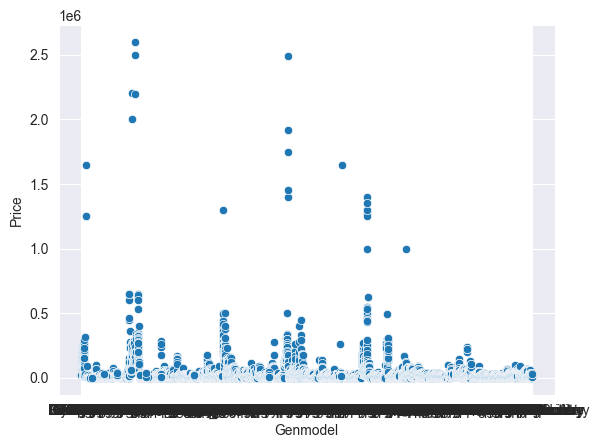

In [32]:
sns.scatterplot(df, x="Genmodel", y="Price")

## Body_Type

In [33]:
df["Body_Type"].value_counts().reset_index()

,Bodytype,count
0,Hatchback,103767
1,SUV,64396
2,Saloon,22582
3,MPV,22507
4,Coupe,17080
5,Estate,16797
6,Convertible,13205
7,Pickup,5268
8,Combi Van,657
9,Panel Van,477


/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/3068577615.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


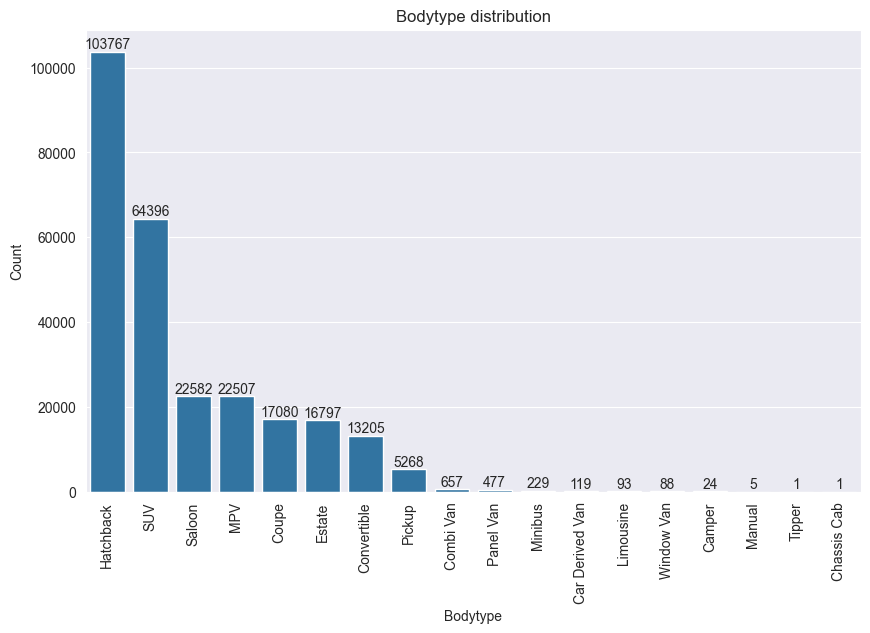

In [34]:
plt.figure(figsize=(10, 6))
plt.title("Body_Type distribution")
plt.xlabel("Body_Type")
plt.ylabel("Count")

labels = df["Body_Type"].value_counts().index
counted = df["Body_Type"].value_counts().reset_index()

g = sns.barplot(counted, x="Body_Type", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/4170601594.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


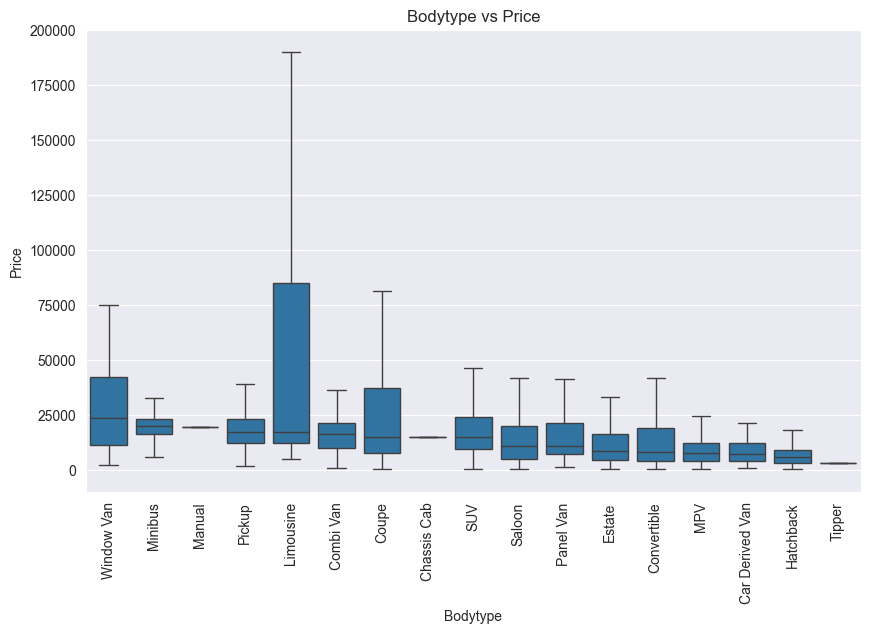

In [35]:
plt.figure(figsize=(10,6))
plt.title("Body_Type vs Price")
plt.xlabel("Body_Type")
plt.ylabel("Price")

labels = sample.groupby("Body_Type")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=sample, x="Body_Type", y="Price", fliersize=0, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-10000, 200000)

plt.show()

### Body_Type - Vans

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/1986224436.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=45)


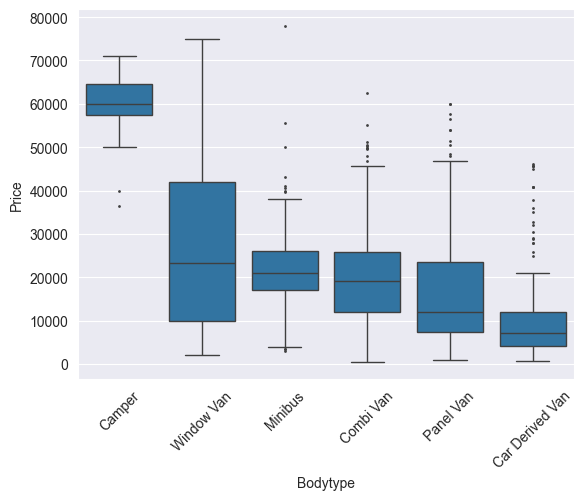

In [36]:
vans = df[df["Body_Type"].isin(["Combi Van", "Panel Van", "Minibus", "Car Derived Van", "Window Van", "Camper"])]

labels = vans.groupby("Body_Type")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=vans, x="Body_Type", y="Price", fliersize=1, order=labels)

g.set_xticklabels(labels, rotation=45)

plt.show()

# Categorical variables vs Price

Model with grouping by Maker;
Fuel_Type or Gearbox type;
Color as a controversy.

### Genmodel

In [120]:
df["Maker"].value_counts().head(10)

Maker
Ford          26936
Audi          22521
Vauxhall      20157
Volkswagen    17999
BMW           17194
Nissan        13830
Peugeot       10882
Land Rover     9927
Toyota         9899
Citroen        9281
Name: count, dtype: int64

In [66]:
makers = df.groupby("Maker")

In [68]:
makers["Price"].mean().sort_values(ascending=False)

Maker
Pagani         1.650000e+06
Bugatti        1.383333e+06
Koenigsegg     1.300000e+06
Lamborghini    2.329342e+05
Ferrari        1.929391e+05
                   ...     
Rover          1.683533e+03
Opel           1.308750e+03
Proton         1.197391e+03
Perodua        1.055000e+03
Daewoo         8.803684e+02
Name: Price, Length: 88, dtype: float64

In [117]:
audi = makers.get_group("Audi")
audi["Genmodel"].value_counts().reset_index()

,Genmodel,count
0,A3,2010
1,Q3,1731
2,Q5,1522
3,A1,1406
4,A6 Saloon,1380
5,A4,1239
6,Q7,1156
7,TT,1135
8,A6 Avant,1022
9,A4 Avant,938


/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/754106310.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


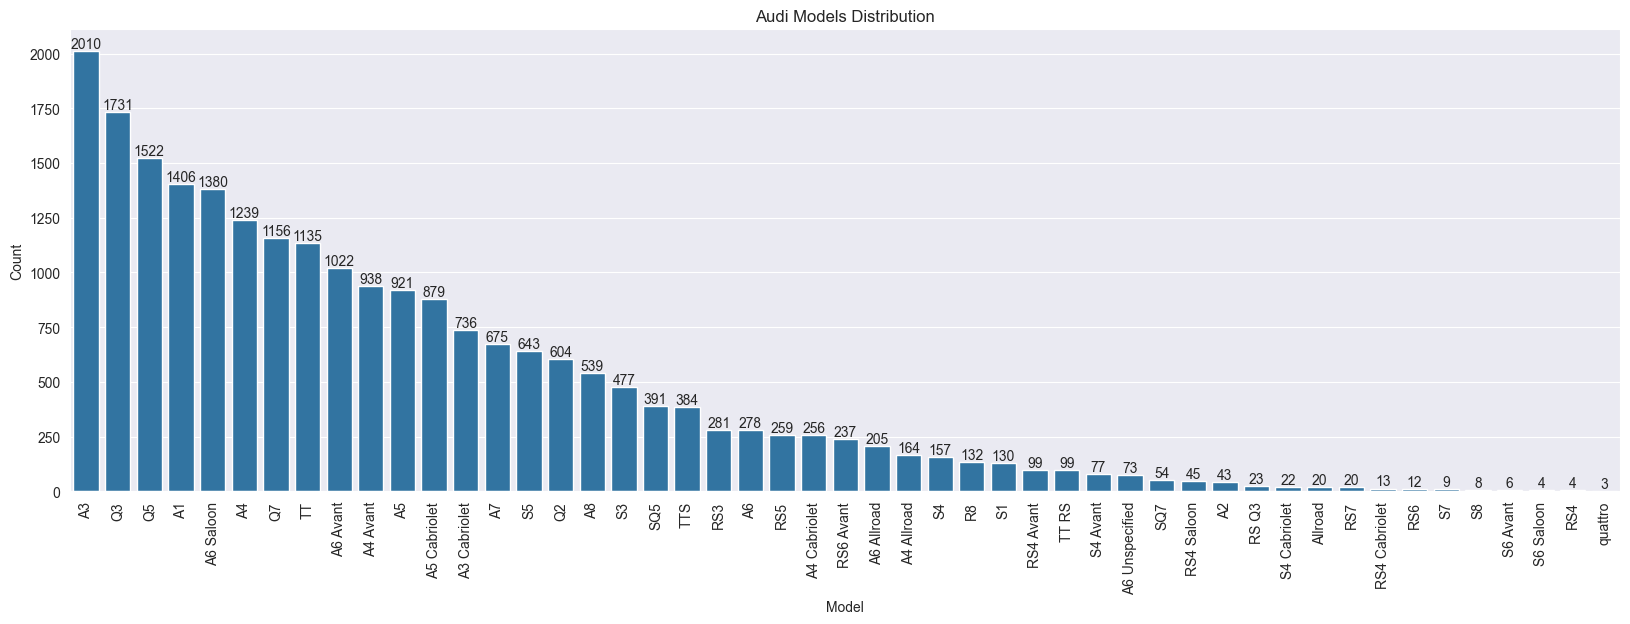

In [118]:
plt.figure(figsize=(20, 6))
plt.title("Audi Models Distribution")
plt.xlabel("Model")
plt.ylabel("Count")

labels = audi["Genmodel"].value_counts().index
counted = audi["Genmodel"].value_counts().reset_index()

g = sns.barplot(counted, x="Genmodel", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()

In [75]:
audi["Price"].describe()

count     22521.000000
mean      18958.661649
std       14896.917603
min         280.000000
25%        9000.000000
50%       16750.000000
75%       25000.000000
max      999999.000000
Name: Price, dtype: float64

In [76]:
audi["Price"].mode()

0    9995.0
Name: Price, dtype: float64

In [ ]:
r8 = audi[audi["Genmodel"] == "R8"]
sns.histplot(r8, x="Price")

In [102]:
audi[audi["Price"] == 999999]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Bodytype,Gearbox,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
170056,Audi,R8,7_23,7_23_46,2017,Sep,Grey,Coupe,Automatic,Petrol,...,602.0,555.0,2650.0,1240.0,2037.0,4426.0,230.0,205.0,2.0,2.0


In [112]:
audi = audi.drop(audi[audi["Price"] == 999999].index)

<Axes: xlabel='Price', ylabel='Count'>

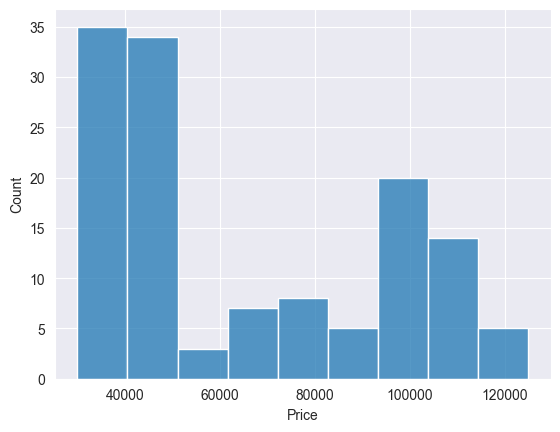

In [113]:
r8 = audi[audi["Genmodel"] == "R8"]
sns.histplot(r8, x="Price")

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/2017297421.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


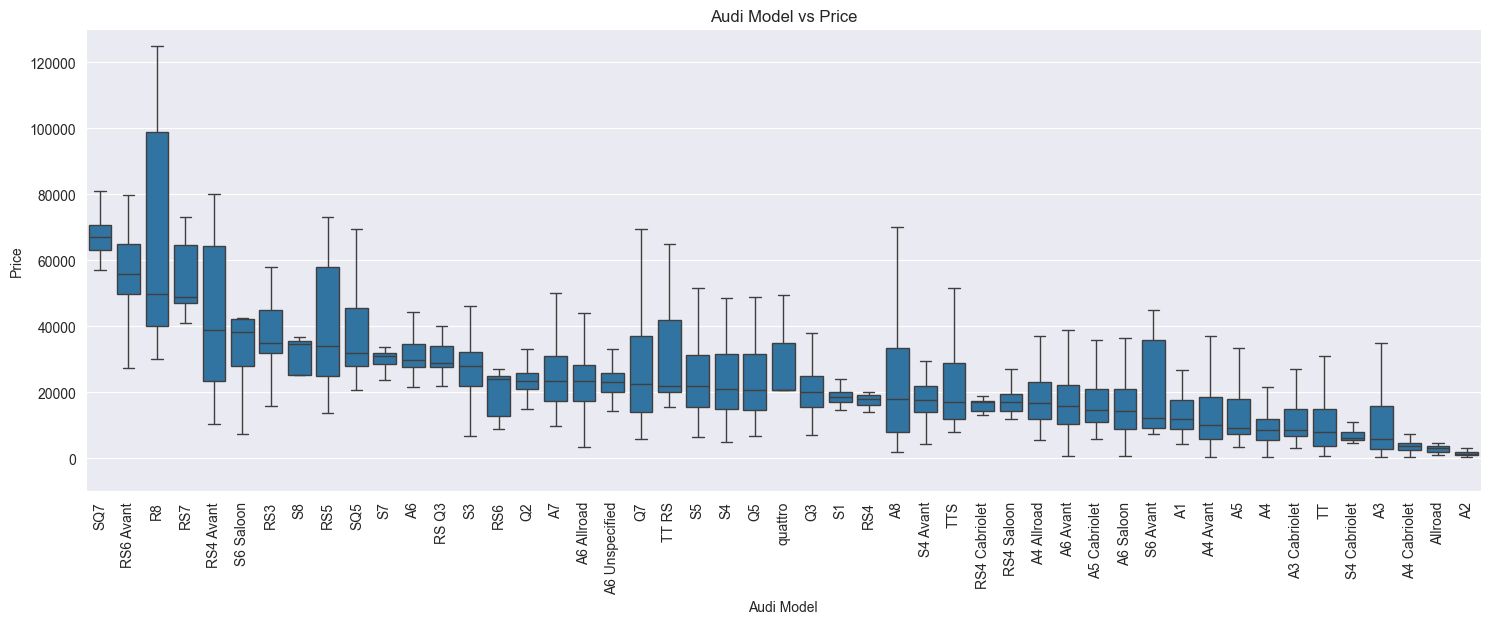

In [122]:
plt.figure(figsize=(18, 6))
plt.title("Audi Model vs Price")
plt.xlabel("Audi Model")
plt.ylabel("Price")

labels = audi.groupby("Genmodel")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(audi, x="Genmodel", y="Price", fliersize=0, order=labels)
g.set_xticklabels(labels, rotation=90)

plt.ylim(-10000, 130000)
plt.show()

In [123]:
ford = makers.get_group("Ford")
ford["Price"].describe()

count     26936.000000
mean       8748.522498
std        7736.725663
min         100.000000
25%        3250.000000
50%        7480.000000
75%       12000.000000
max      284990.000000
Name: Price, dtype: float64

In [124]:
ford['Price'].mode()

0    995.0
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

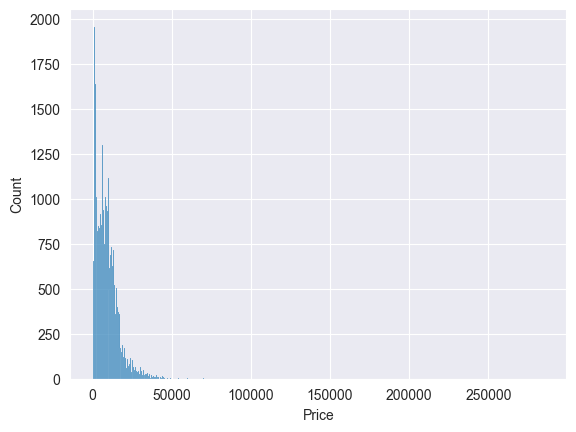

In [125]:
sns.histplot(ford['Price'])

In [126]:
ford[ford['Price'] > 100000]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Bodytype,Gearbox,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
35534,Ford,GT,29_22,29_22_1,2018,Mar,Silver,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
35535,Ford,GT,29_22,29_22_2,2018,Feb,Silver,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
35536,Ford,GT,29_22,29_22_3,2018,Apr,Red,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35537,Ford,GT,29_22,29_22_4,2018,Mar,Red,Coupe,Manual,Petrol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [129]:
ford[ford['Price'] <= 500]

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_Year,Adv_Month,Color,Bodytype,Gearbox,Fuel_Type,...,Engine_Power,Annual_Tax,Wheelbase,Height,Width,Length,Average_Mpg,Top_Speed,Seat_Num,Door_Num
22162,Ford,Fiesta,29_13,29_13_37,2018,Jul,Silver,Hatchback,Manual,Petrol,...,74.0,155.0,2486.0,1468.0,1683.0,3917.0,456.0,101.0,5.0,3.0
22176,Ford,Fiesta,29_13,29_13_51,2018,Jul,Red,Hatchback,Manual,Petrol,...,59.0,230.0,2446.0,1320.0,1793.0,3828.0,387.0,95.0,5.0,3.0
22191,Ford,Fiesta,29_13,29_13_66,2018,Aug,Blue,Hatchback,Manual,Petrol,...,74.0,195.0,2446.0,1320.0,1793.0,3828.0,409.0,104.0,5.0,3.0
22229,Ford,Fiesta,29_13,29_13_104,2018,May,Red,Hatchback,Manual,Petrol,...,59.0,230.0,2446.0,1320.0,1793.0,3828.0,387.0,95.0,5.0,5.0
22300,Ford,Fiesta,29_13,29_13_175,2018,Aug,Silver,Hatchback,Manual,Diesel,...,67.0,30.0,2486.0,1463.0,1683.0,3917.0,642.0,102.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44442,Ford,Puma,29_29,29_29_6,2018,Jan,Red,Coupe,Manual,Petrol,...,123.0,250.0,2446.0,1344.0,1837.0,3984.0,382.0,126.0,4.0,3.0
46494,Ford,Streetka,29_32,29_32_9,2018,Aug,Blue,Convertible,Manual,Petrol,...,94.0,290.0,2450.0,1332.0,1852.0,3650.0,358.0,108.0,2.0,2.0
46513,Ford,Streetka,29_32,29_32_28,2018,Aug,Red,Convertible,Manual,Petrol,...,94.0,290.0,2450.0,1332.0,1852.0,3650.0,358.0,108.0,2.0,2.0
46535,Ford,Streetka,29_32,29_32_50,2018,Aug,Silver,Convertible,Manual,Petrol,...,94.0,290.0,2450.0,1332.0,1852.0,3650.0,358.0,108.0,2.0,2.0


## Color 

I'd think it shouldn't be so important, but according to the statistical tests it significantly influence prices.

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/2002545761.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


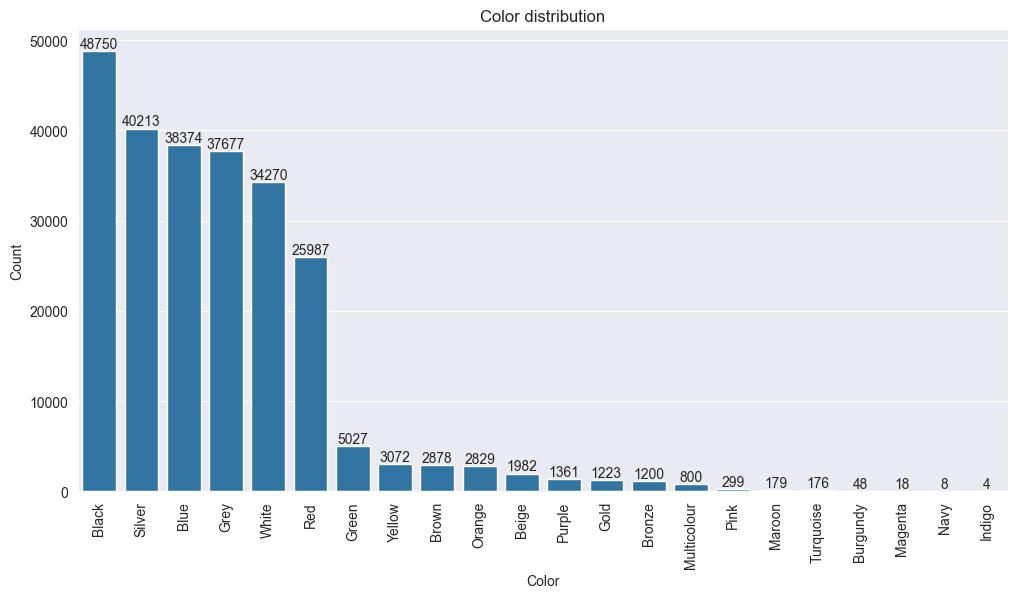

In [37]:
plt.figure(figsize=(12, 6))
plt.title("Color distribution")
plt.xlabel("Color")
plt.ylabel("Count")

labels = df["Color"].value_counts().index
counted = df["Color"].value_counts().reset_index()

g = sns.barplot(counted, x="Color", y="count", order=labels)

g.bar_label(g.containers[0])
g.set_xticklabels(labels, rotation=90)

plt.show()

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/2867429671.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels, rotation=90)


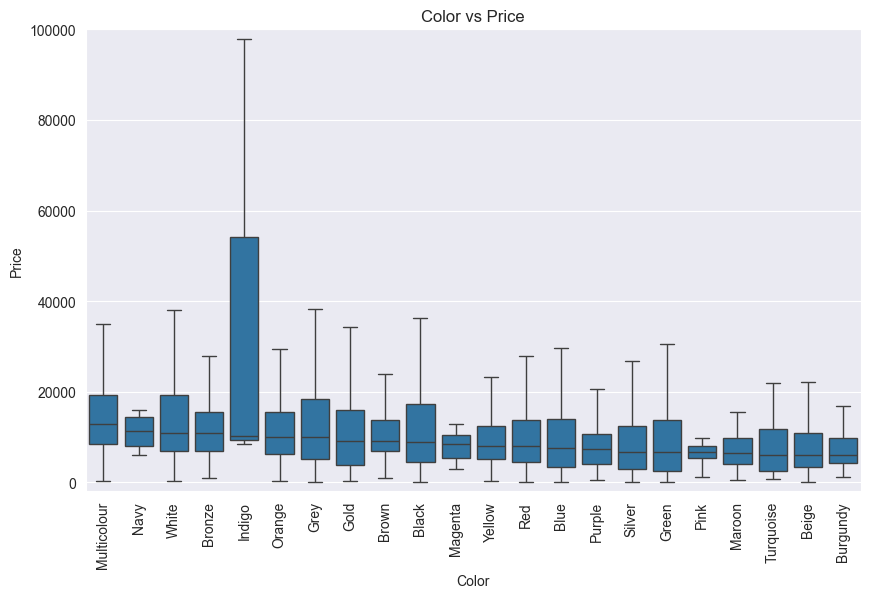

In [62]:
plt.figure(figsize=(10,6))
plt.title("Color vs Price")
plt.xlabel("Color")
plt.ylabel("Price")

labels = sample.groupby("Color")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=sample, x="Color", y="Price", fliersize=0, order=labels)

g.set_xticklabels(labels, rotation=90)
plt.ylim(-2000, 100000)

plt.show()

### Let's examine colors with at least 1000 observations

In [39]:
slice = df["Color"].value_counts()[df["Color"].value_counts() > 1000].index
colors = df[df["Color"].isin(slice)]


/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/3631552969.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(slice, rotation=90)


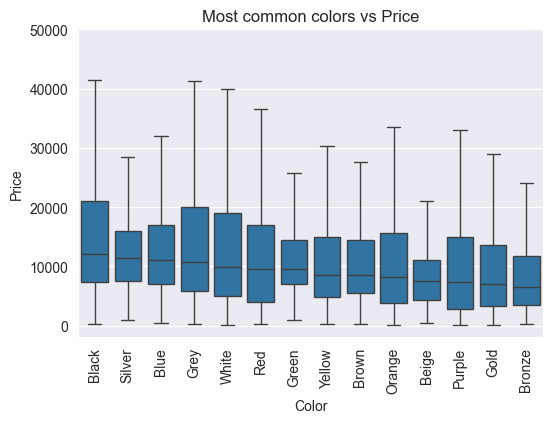

In [56]:
plt.figure(figsize=(6,4))
plt.title("Most common colors vs Price")
plt.xlabel("Color")
plt.ylabel("Price")

labels = colors.groupby("Color")["Price"].median().sort_values(ascending=False).index
g = sns.boxplot(data=colors, x="Color", y="Price", fliersize=0, order=labels)

g.set_xticklabels(slice, rotation=90)
plt.ylim(-2000, 50000)

plt.show()

#### Is the difference still significant?

According to the following Kruskal-wallis test it is, but the test doesn't specify which categories differ specifically, so further paired tests are still necessary.  

In [41]:
def write_names(category):
    values = category.unique()
    names = {}
    numbers = {}
    cat_nr = 1
    for name in values:
        if name != np.nan:
            numbers[name] = cat_nr
            names[cat_nr] = name
            cat_nr += 1      
    return numbers, names

def swap(category, col_dict):
    return category.apply(lambda x : col_dict[x])

In [42]:
to_num, to_cat = write_names(colors["Color"])

In [201]:
colors["Color"] = swap(colors["Color"], to_num)

In [202]:
stats.kruskal(colors["Price"], colors["Color"], nan_policy="omit")

KruskalResult(statistic=367508.86227223463, pvalue=0.0)

#### Let's compare 2 colors with the most similar distribution of Prices based on the box plot.

In [45]:
to_cat

{1: 'Silver',
 2: 'Grey',
 3: 'Blue',
 4: 'Green',
 5: 'Black',
 6: 'White',
 7: 'Red',
 8: 'Brown',
 9: 'Orange',
 10: 'Purple',
 11: 'Yellow',
 12: 'Gold',
 13: 'Bronze',
 14: 'Beige'}

In [203]:
grey = colors[colors["Color"] == 2]
white = colors[colors["Color"] == 6]

In [205]:
stats.mannwhitneyu(grey["Price"], white["Price"], nan_policy="omit")

MannwhitneyuResult(statistic=576731271.5, pvalue=2.7676464955083977e-110)

#### Now let's examine 2 colors with the most diverse distributions

In [207]:
black = colors[colors["Color"] == 5]
beige = colors[colors["Color"] == 14]

In [208]:
stats.mannwhitneyu(black["Price"], beige["Price"], nan_policy="omit")

MannwhitneyuResult(statistic=59732004.0, pvalue=1.534602651510666e-77)

In [52]:
colors["Color"] = swap(colors["Color"], to_cat)

/var/folders/c3/83sn5hxx1p58qnx62797mhc40000gp/T/ipykernel_1830/197781792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colors["Color"] = swap(colors["Color"], to_cat)


### Color vs Price - Conclusion

Based on the test results, it appears that the price is significantly different based on the car color. However, based on the logical reasoning it shouldn't happen. That leads to the conclusion that it might be an apparent correlation.

# Numeric variables vs Price

Reg_Year, Mileage, Engine_Power, maybe Length

In [64]:
df["Adv_Year"].nunique()

9

In [65]:
stats.spearmanr(df["Mileage"], df["Reg_Year"], nan_policy="omit")

SignificanceResult(statistic=-0.8354994805302389, pvalue=0.0)